In [496]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("C:/Users/Ank/Desktop/bigMart/Train_UWu5bXk.csv")
test = pd.read_csv("C:/Users/Ank/Desktop/bigMart/Test_u94Q5KV.csv")
print(train.head())
print(test.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [497]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [498]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [499]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [500]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [501]:
full_data = [train,test]
full_data

[     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
 0              FDA15        9.300          Low Fat         0.016047   
 1              DRC01        5.920          Regular         0.019278   
 2              FDN15       17.500          Low Fat         0.016760   
 3              FDX07       19.200          Regular         0.000000   
 4              NCD19        8.930          Low Fat         0.000000   
 5              FDP36       10.395          Regular         0.000000   
 6              FDO10       13.650          Regular         0.012741   
 7              FDP10          NaN          Low Fat         0.127470   
 8              FDH17       16.200          Regular         0.016687   
 9              FDU28       19.200          Regular         0.094450   
 10             FDY07       11.800          Low Fat         0.000000   
 11             FDA03       18.500          Regular         0.045464   
 12             FDX32       15.100          Regular         0.10

In [502]:
print(len((train["Item_Fat_Content"]).unique()))

5


In [503]:
for data in full_data:
    print(data.apply(lambda x: len(x.unique())))
    print()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64



In [504]:
cat_var = ['Item_Fat_Content','Item_Type','Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
           'Outlet_Location_Type','Outlet_Type']
num_vat = ["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"]

In [505]:
for data in full_data:
    for var in cat_var:
        print(data[var].value_counts(dropna=False))
    print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
Medium    2793
NaN       2410
Sm

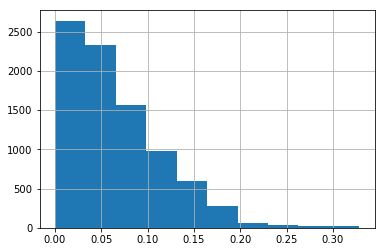

In [506]:
train["Item_Visibility"].hist()

In [507]:
sum(train["Item_Visibility"]==0)

526

# Imputing missing data

Item weight, outlet size, item visibility = 0

In [508]:
full_data_concat = pd.concat(full_data)
full_data_concat

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [509]:
print((full_data_concat["Item_Identifier"][full_data_concat["Item_Weight"].isnull()]).unique())
print(len((full_data_concat["Item_Identifier"][full_data_concat["Item_Weight"].isnull()]).unique()))

print((full_data_concat["Outlet_Identifier"][full_data_concat["Outlet_Size"].isnull()]).unique())
print(len((full_data_concat["Outlet_Identifier"][full_data_concat["Outlet_Size"].isnull()]).unique()))

['FDP10' 'DRI11' 'FDW12' ..., 'FDC39' 'DRE03' 'FDN31']
1559
['OUT010' 'OUT045' 'OUT017']
3


In [510]:
print(full_data_concat[["Item_Identifier","Item_Weight"]][full_data_concat["Item_Identifier"]=='FDP10'])
print()
print(full_data_concat[["Outlet_Identifier","Outlet_Type","Outlet_Size"]][full_data_concat["Outlet_Identifier"]=='OUT010'])

     Item_Identifier  Item_Weight
7              FDP10          NaN
585            FDP10         19.0
2623           FDP10         19.0
3382           FDP10         19.0
4585           FDP10         19.0
6087           FDP10         19.0
7883           FDP10         19.0
3373           FDP10         19.0
3848           FDP10         19.0
4804           FDP10          NaN

     Outlet_Identifier    Outlet_Type Outlet_Size
3               OUT010  Grocery Store         NaN
28              OUT010  Grocery Store         NaN
30              OUT010  Grocery Store         NaN
45              OUT010  Grocery Store         NaN
65              OUT010  Grocery Store         NaN
90              OUT010  Grocery Store         NaN
122             OUT010  Grocery Store         NaN
133             OUT010  Grocery Store         NaN
139             OUT010  Grocery Store         NaN
174             OUT010  Grocery Store         NaN
175             OUT010  Grocery Store         NaN
177             OUT010  G

In [511]:
data_avg_wt = full_data_concat.pivot_table(index="Item_Identifier", values="Item_Weight")
data_avg_wt

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [512]:
data_avg_wt.loc["FDP10"]

Item_Weight    19.0
Name: FDP10, dtype: float64

In [513]:
#full_data_concat.hist(column="Outlet_Size",by="Outlet_Type")

In [514]:
miss_bool = full_data_concat['Item_Weight'].isnull()
full_data_concat.loc[miss_bool,"Item_Weight"] = full_data_concat.loc[miss_bool,"Item_Identifier"].apply(lambda x: data_avg_wt.loc[x])

In [515]:
miss_bool = full_data_concat['Item_Weight'].isnull()
sum(miss_bool)

0

In [516]:
full_data_concat[full_data_concat['Outlet_Type']=='Grocery Store']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.057557,15.500,1985,OUT019,Tier 1,Small,Grocery Store
28,Regular,FDE51,45.5086,178.4344,Dairy,0.161467,5.925,1998,OUT010,Tier 3,NaN,Grocery Store
29,Regular,FDC14,43.6454,125.8362,Canned,0.072222,14.500,1985,OUT019,Tier 1,Small,Grocery Store
30,Low Fat,FDV38,55.7956,163.7868,Dairy,0.170349,19.250,1998,OUT010,Tier 3,NaN,Grocery Store
45,LF,FDM39,178.1002,358.2004,Dairy,0.089499,6.420,1998,OUT010,Tier 3,NaN,Grocery Store
49,Regular,FDS02,196.8794,780.3176,Dairy,0.255395,10.195,1985,OUT019,Tier 1,Small,Grocery Store
59,Low Fat,FDI26,180.0344,892.1720,Canned,0.061082,5.940,1985,OUT019,Tier 1,Small,Grocery Store
63,Regular,FDY40,51.0692,147.8076,Frozen Foods,0.150286,15.500,1985,OUT019,Tier 1,Small,Grocery Store
65,LF,FDC46,185.4266,184.4266,Snack Foods,0.195068,17.700,1998,OUT010,Tier 3,NaN,Grocery Store


In [517]:
len(full_data_concat[full_data_concat['Outlet_Type']=='Grocery Store'])

1805

In [518]:
def func(col1, col2):
    dict = {}
    for i in range (0,full_data_concat.shape[0]):
        if col1.iloc[i] in dict:
            if col2.iloc[i] in dict[col1.iloc[i]]:
                dict[col1.iloc[i]][col2.iloc[i]] += 1 
            else:
                dict[col1.iloc[i]][col2.iloc[i]] = 1
        else:
            dict[col1.iloc[i]] = {}
    
    return(dict)
     
print(func(full_data_concat['Outlet_Type'], full_data_concat['Outlet_Size']))

{'Supermarket Type1': {'Medium': 1549, 'High': 1553, nan: 3091, 'Small': 3100}, 'Supermarket Type2': {'Medium': 1545}, 'Grocery Store': {'Small': 880, nan: 924}, 'Supermarket Type3': {'Medium': 1558}}


In [519]:
full_data_concat.loc[full_data_concat['Outlet_Size'].isnull(),'Outlet_Size']='Small'

In [520]:
print(func(full_data_concat['Outlet_Type'], full_data_concat['Outlet_Size']))

{'Supermarket Type1': {'Medium': 1549, 'High': 1553, 'Small': 6191}, 'Supermarket Type2': {'Medium': 1545}, 'Grocery Store': {'Small': 1804}, 'Supermarket Type3': {'Medium': 1558}}


In [521]:
print((full_data_concat["Item_Identifier"][full_data_concat["Item_Visibility"]==0]).unique())
print(len((full_data_concat["Item_Identifier"][full_data_concat["Item_Visibility"]==0]).unique()))

['FDX07' 'NCD19' 'FDP36' 'FDY07' 'FDP33' 'FDO23' 'NCP05' 'FDM20' 'FDH35'
 'FDV25' 'FDG12' 'FDV11' 'FDI16' 'FDB36' 'FDR47' 'FDL58' 'NCZ54' 'FDR44'
 'FDA39' 'FDS49' 'FDR04' 'FDX25' 'FDZ07' 'FDY28' 'FDC50' 'FDP22' 'NCZ42'
 'FDA27' 'DRH15' 'FDU56' 'FDM24' 'FDW28' 'NCG42' 'NCK54' 'FDK24' 'FDL52'
 'FDK44' 'FDB38' 'FDS32' 'DRB48' 'FDU04' 'FDK48' 'FDN27' 'FDX46' 'FDY59'
 'FDE05' 'NCQ05' 'FDU32' 'FDZ28' 'FDA10' 'FDY02' 'FDA03' 'FDO10' 'FDW49'
 'FDR23' 'FDA47' 'FDS31' 'FDQ31' 'FDV01' 'FDZ12' 'DRK12' 'FDG45' 'FDV07'
 'NCO17' 'DRG27' 'FDK60' 'FDC44' 'FDB21' 'NCO43' 'NCX41' 'NCD07' 'FDD09'
 'DRH59' 'FDR48' 'DRA12' 'DRG11' 'FDZ35' 'NCA42' 'FDF04' 'FDO50' 'FDN12'
 'NCK29' 'FDM32' 'FDI41' 'FDN10' 'FDZ31' 'FDC39' 'FDZ20' 'FDW38' 'DRF37'
 'FDZ50' 'DRH51' 'FDM08' 'FDX56' 'FDF52' 'NCR53' 'NCC31' 'FDY24' 'FDY12'
 'FDZ34' 'FDD21' 'FDV24' 'FDE11' 'FDR32' 'FDF32' 'FDR46' 'FDC28' 'DRE15'
 'FDP19' 'FDX37' 'DRZ24' 'NCR54' 'FDV20' 'FDT40' 'FDM33' 'FDL20' 'DRK49'
 'FDN09' 'NCO02' 'FDS13' 'FDD51' 'DRH36' 'FDG44' 'F

In [522]:
full_data_concat[["Item_Identifier","Item_Visibility"]][full_data_concat["Item_Identifier"]=='FDX07']

,Item_Identifier,Item_Visibility
3,FDX07,0.000000
1491,FDX07,0.022914
2459,FDX07,0.022965
3089,FDX07,0.000000
5906,FDX07,0.022954
7735,FDX07,0.022808
531,FDX07,0.023048
3551,FDX07,0.022919
4038,FDX07,0.022900


In [523]:
avg_vis = full_data_concat[full_data_concat["Item_Visibility"] != 0].pivot_table(index="Item_Identifier",values="Item_Visibility")
avg_vis.loc["FDX07"]

Item_Visibility    0.02293
Name: FDX07, dtype: float64

In [524]:
miss_vis = full_data_concat["Item_Visibility"]==0
full_data_concat.loc[miss_vis,"Item_Visibility"] = full_data_concat.loc[miss_vis,"Item_Identifier"].apply(lambda x: avg_vis.loc[x])

In [525]:
full_data_concat[["Item_Identifier","Item_Visibility"]][full_data_concat["Item_Identifier"]=='FDX07']

,Item_Identifier,Item_Visibility
3,FDX07,0.022930
1491,FDX07,0.022914
2459,FDX07,0.022965
3089,FDX07,0.022930
5906,FDX07,0.022954
7735,FDX07,0.022808
531,FDX07,0.023048
3551,FDX07,0.022919
4038,FDX07,0.022900


In [526]:
full_data_concat["Item_Fat_Content"]=full_data_concat["Item_Fat_Content"].replace({"LF": "Low Fat" ,  "reg" : "Regular",  "low fat" :  "Low Fat" })
full_data_concat["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [528]:
full_data_concat["outlet_age"] = 2013 - full_data_concat["Outlet_Establishment_Year"]
full_data_concat['Item_Visibility_MeanRatio'] = full_data_concat.apply(lambda x: x['Item_Visibility']/avg_vis.loc[x['Item_Identifier']], axis=1)

In [530]:
full_data_concat

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,outlet_age,Item_Visibility_MeanRatio
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,14,0.931078
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,4,0.933420
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,14,0.864062
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.200,1998,OUT010,Tier 3,Small,Grocery Store,15,1.000000
4,Low Fat,NCD19,53.8614,994.7052,Household,0.014670,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,26,1.000000
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.091294,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,4,1.000000
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,26,0.898318
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,Tier 3,Medium,Supermarket Type3,28,0.870493
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Small,Supermarket Type1,11,0.924160
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Small,Supermarket Type1,6,0.867585


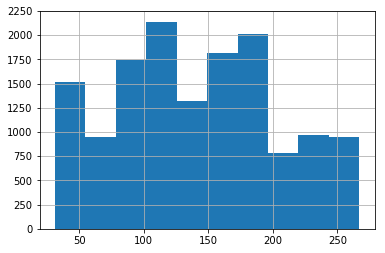

In [531]:
full_data_concat["Item_MRP"].hist()

In [532]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
full_data_concat['Outlet'] = le.fit_transform(full_data_concat['Outlet_Identifier'])

var = [ 'Item_Fat_Content','Item_Type','Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for i in var:
    full_data_concat[i] = le.fit_transform(full_data_concat[i])
    
full_data_concat

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,outlet_age,Item_Visibility_MeanRatio,Outlet
0,0,FDA15,249.8092,3735.1380,4,0.016047,9.300,1999,OUT049,0,1,1,14,0.931078,9
1,1,DRC01,48.2692,443.4228,14,0.019278,5.920,2009,OUT018,2,1,2,4,0.933420,3
2,0,FDN15,141.6180,2097.2700,10,0.016760,17.500,1999,OUT049,0,1,1,14,0.864062,9
3,1,FDX07,182.0950,732.3800,6,0.022930,19.200,1998,OUT010,2,2,0,15,1.000000,0
4,0,NCD19,53.8614,994.7052,9,0.014670,8.930,1987,OUT013,2,0,1,26,1.000000,1
5,1,FDP36,51.4008,556.6088,0,0.091294,10.395,2009,OUT018,2,1,2,4,1.000000,3
6,1,FDO10,57.6588,343.5528,13,0.012741,13.650,1987,OUT013,2,0,1,26,0.898318,1
7,0,FDP10,107.7622,4022.7636,13,0.127470,19.000,1985,OUT027,2,1,3,28,0.870493,5
8,1,FDH17,96.9726,1076.5986,5,0.016687,16.200,2002,OUT045,1,2,1,11,0.924160,7
9,1,FDU28,187.8214,4710.5350,5,0.094450,19.200,2007,OUT017,1,2,1,6,0.867585,2


In [533]:
#One Hot Coding:
full_data_concat = pd.get_dummies(full_data_concat, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type','Outlet'])

In [534]:
full_data_concat.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
outlet_age                     int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_0                    uint8
Item_Type_1                    uint8
Item_Type_2                    uint8
Item_Type_3                    uint8
Item_Type_4                    uint8
Item_Type_5                    uint8
I

In [535]:
full_data_concat.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)
train = full_data_concat.iloc[0:8523]
test = full_data_concat.iloc[8523:14204]
test.drop(["Item_Outlet_Sales"],axis=1,inplace=True)

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [539]:
train.to_csv("C:/Users/Ank/Desktop/bigMart/train_modified.csv",index=False)
test.to_csv("C:/Users/Ank/Desktop/bigMart/test_modified.csv",index=False)

# Model Building

baseline model

In [540]:
mean_sales = train["Item_Outlet_Sales"].mean()
base = test[["Item_Identifier", "Outlet_Identifier"]]
base['Item_Outlet_Sales'] = mean_sales
base.to_csv("C:/Users/Ank/Desktop/bigMart/first_sub.csv", index=False)

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [541]:
train.columns

Index(['Item_Identifier', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Visibility',
       'Item_Weight', 'Outlet_Identifier', 'outlet_age',
       'Item_Visibility_MeanRatio', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'Item_Type_15', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [580]:
train_X = train[['Item_MRP', 'Item_Visibility',
       'Item_Weight', 'outlet_age', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9']]
train_Y = train["Item_Outlet_Sales"]
test_X = test[['Item_MRP','Item_Visibility',
       'Item_Weight', 'outlet_age', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9']]
train_X.columns

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'outlet_age',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15', 'Outlet_0', 'Outlet_1', 'Outlet_2',
       'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Outlet_9'],
      dtype='object')

In [581]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X,train_Y)
base['Item_Outlet_Sales'] = lr.predict(test_X)
base.to_csv("C:/Users/Ank/Desktop/bigMart/linear.csv", index=False)

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [582]:
pd.Series(lr.coef_,train_X.columns).sort_values()

Outlet_Type_0            -888.449187
Outlet_4                 -446.768317
Outlet_0                 -441.680871
Outlet_Size_2            -268.531270
Outlet_Location_Type_0   -215.196770
Item_Visibility          -176.328741
Outlet_9                 -140.215763
Outlet_Size_0            -102.992031
Outlet_1                 -102.992031
Outlet_7                  -83.153482
Outlet_3                  -81.476676
Outlet_Type_2             -81.476676
Item_Type_4               -47.598450
Item_Type_9               -45.117595
Item_Type_5               -33.836415
Outlet_Location_Type_2    -32.933838
Item_Type_14              -32.833012
Item_Type_11              -27.382624
Item_Fat_Content_0        -20.192907
Item_Type_13              -17.455269
Item_Type_8               -15.300033
Item_Type_10               -5.790771
Item_Type_0                -5.561728
Item_Type_7                -5.079355
Item_Type_2                -0.935298
Item_Weight                 0.089773
Item_Type_1                 0.225421
I

Decision Tree

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Item_Type_4               0.000000
Item_Type_5               0.000000
Item_Type_6               0.000000
Item_Type_7               0.000000
Item_Type_8               0.000000
Item_Type_9               0.000000
Item_Type_10              0.000000
Item_Type_11              0.000000
Outlet_8                  0.000000
Item_Type_12              0.000000
Item_Type_14              0.000000
Item_Type_15              0.000000
Outlet_1                  0.000000
Outlet_2                  0.000000
Outlet_4                  0.000000
Outlet_5                  0.000000
Outlet_6                  0.000000
Item_Type_13              0.000000
Item_Type_3               0.000000
Outlet_9                  0.000000
Item_Type_1               0.000000
Item_Fat_Content_0        0.000000
Item_Fat_Content_1        0.000000
Outlet_Location_Type_0    0.000000
Item_Type_2               0.000000
Outlet_Size_0             0.000000
Outlet_Location_Type_1    0.000000
Outlet_Type_2             0.000000
Item_Type_0         

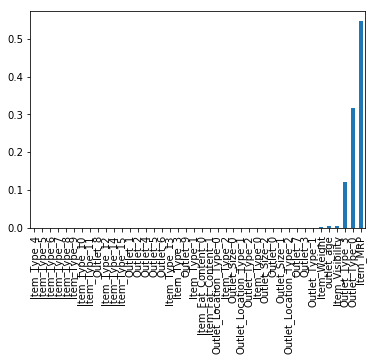

In [583]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=8, min_samples_leaf=80)
dtr.fit(train_X,train_Y)
base['Item_Outlet_Sales'] = dtr.predict(test_X)
base.to_csv("C:/Users/Ank/Desktop/bigMart/decision_tree.csv", index=False)
a = pd.Series(dtr.feature_importances_,train_X.columns).sort_values()
a.plot(kind='bar')
a

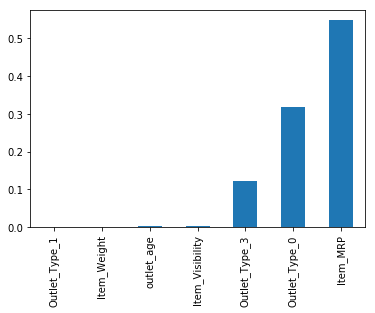

In [584]:
b = a.iloc[-7:]
b.plot(kind='bar')

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Outlet_5         0.000000
outlet_age       0.127598
Outlet_Type_0    0.326075
Item_MRP         0.546327
dtype: float64

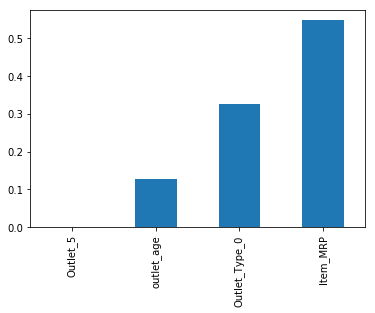

In [585]:
train_x = train[["Item_MRP", 'Outlet_Type_0', 'outlet_age', 'Outlet_5']]
test_x = test[["Item_MRP", 'Outlet_Type_0', 'outlet_age', 'Outlet_5']]
dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=130)
dtr.fit(train_x,train_Y)
base['Item_Outlet_Sales'] = dtr.predict(test_x)
base.to_csv("C:/Users/Ank/Desktop/bigMart/decision_tree_limited.csv", index=False)
a = pd.Series(dtr.feature_importances_,train_x.columns).sort_values()
a.plot(kind='bar')
a

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Item_Type_4               0.000000e+00
Item_Type_5               0.000000e+00
Item_Type_3               0.000000e+00
Item_Type_2               0.000000e+00
Item_Type_1               0.000000e+00
Item_Type_0               0.000000e+00
Item_Type_8               0.000000e+00
Item_Type_10              0.000000e+00
Item_Type_11              0.000000e+00
Item_Type_12              0.000000e+00
Item_Type_14              0.000000e+00
Item_Type_15              0.000000e+00
Outlet_Size_0             0.000000e+00
Item_Type_7               0.000000e+00
Outlet_0                  5.422742e-07
Outlet_4                  1.492694e-06
Outlet_1                  2.849635e-06
Item_Type_13              1.282460e-05
Item_Type_9               1.539320e-05
Outlet_2                  5.594798e-05
Outlet_8                  7.480189e-05
Item_Type_6               9.176745e-05
Item_Fat_Content_1        1.074871e-04
Item_Fat_Content_0        1.145995e-04
Outlet_9                  1.184223e-04
Outlet_6                 

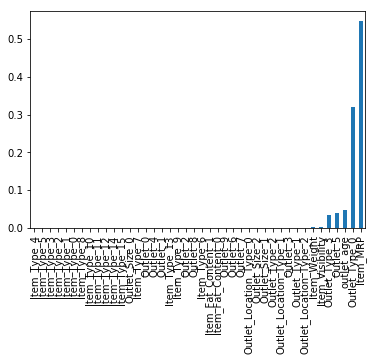

In [586]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=400,max_depth=7, min_samples_leaf=90,n_jobs=-1)
rfr.fit(train_X,train_Y)
base['Item_Outlet_Sales'] = rfr.predict(test_X)
base.to_csv("C:/Users/Ank/Desktop/bigMart/random_forest.csv", index=False)
a = pd.Series(rfr.feature_importances_,train_X.columns).sort_values()
a.plot(kind='bar')
a

C:\Users\Ank\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Item_Type_11              0.000000
Item_Type_7               0.000000
Item_Type_3               0.000000
Item_Type_8               0.000000
Item_Type_0               0.000000
Item_Type_14              0.000000
Item_Type_5               0.000000
Outlet_Location_Type_2    0.000000
Outlet_Size_2             0.000000
Outlet_Location_Type_0    0.000000
Item_Fat_Content_1        0.000000
Item_Fat_Content_0        0.000000
Outlet_1                  0.000000
Outlet_4                  0.000000
Outlet_Location_Type_1    0.000000
Item_Type_10              0.000056
Outlet_Size_0             0.000171
Item_Type_1               0.000936
Outlet_Type_2             0.000973
Outlet_3                  0.001015
Outlet_0                  0.001102
Item_Type_12              0.002153
Item_Type_9               0.002270
Item_Type_4               0.002390
Outlet_Size_1             0.002536
Item_Type_15              0.002684
Item_Type_2               0.003296
Outlet_8                  0.003475
Outlet_9            

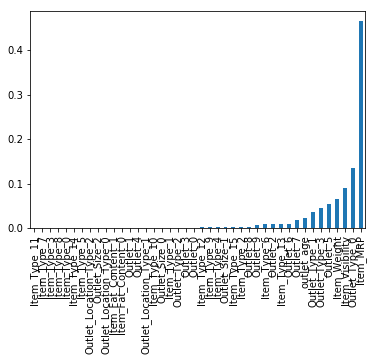

In [587]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=60)
gbr.fit(train_X,train_Y)
base['Item_Outlet_Sales'] = gbr.predict(test_X)
base.to_csv("C:/Users/Ank/Desktop/bigMart/gradient_booster.csv", index=False)
a = pd.Series(gbr.feature_importances_,train_X.columns).sort_values()
a.plot(kind='bar')
a